In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
fpath='Data/final_hypothesis_data.csv.gz'
df=pd.read_csv(fpath,lineterminator='\n')
df.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0122247,0.0,NaN,NaN,0.0,"[{'id': 27, 'name': 'Horror'}, {'id': 35, 'nam...",NaN,27743.0,en,Serial Killing 101,...,0.0,89.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,Serial Killing 101,0.0,5.750,12.0,R
2,tt0146803,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}]",NaN,46730.0,en,"Goodnight, Joseph Parker",...,0.0,0.0,[],Released,When there's no place left to go but home,"Goodnight, Joseph Parker",0.0,6.000,1.0,NaN
3,tt0159290,0.0,/atFOPVD3AKSj16ImD1MJfIklf90.jpg,NaN,0.0,"[{'id': 18, 'name': 'Drama'}]",NaN,101917.0,nl,Bluebird,...,0.0,77.0,"[{'english_name': 'Dutch', 'iso_639_1': 'nl', ...",Released,"Merel, a talented young girl, is suddenly gett...",Bluebird,0.0,6.300,9.0,NaN
4,tt0167190,0.0,/qdTUAwQKQ9n7PfZeVJzs7sOP8S8.jpg,"{'id': 17235, 'name': 'Hellboy Collection', 'p...",66000000.0,"[{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'na...",NaN,1487.0,en,Hellboy,...,99318987.0,122.0,"[{'english_name': 'Russian', 'iso_639_1': 'ru'...",Released,From the dark side to our side.,Hellboy,0.0,6.665,6405.0,PG-13


### Removing outliers

In [3]:
#z_scores=stats.zscore(df['revenue'])
#threshold=3
#df1=np.where(np.abs(z_scores)>threshold)
#df1

In [4]:
df['certification'].value_counts()

R          1439
NR          978
PG-13       823
PG          412
G            95
NC-17        45
Unrated       2
UR            1
PG-13         1
Name: certification, dtype: int64

In [5]:
#adjust pg-13
df['certification']=df['certification'].replace('PG-13 ','PG-13')
df['certification'].value_counts()

R          1439
NR          978
PG-13       824
PG          412
G            95
NC-17        45
Unrated       2
UR            1
Name: certification, dtype: int64

In [6]:
# list of value wanted in certification
clist=['G','PG','PG-13','R']

In [7]:
#Adjust certification column to hold only those values
filter_df=df[df['certification'].isin(clist)]
filter_df.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
1,tt0122247,0.0,NaN,NaN,0.0,"[{'id': 27, 'name': 'Horror'}, {'id': 35, 'nam...",NaN,27743.0,en,Serial Killing 101,...,0.0,89.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,Serial Killing 101,0.0,5.750,12.0,R
4,tt0167190,0.0,/qdTUAwQKQ9n7PfZeVJzs7sOP8S8.jpg,"{'id': 17235, 'name': 'Hellboy Collection', 'p...",66000000.0,"[{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'na...",NaN,1487.0,en,Hellboy,...,99318987.0,122.0,"[{'english_name': 'Russian', 'iso_639_1': 'ru'...",Released,From the dark side to our side.,Hellboy,0.0,6.665,6405.0,PG-13
5,tt0167456,0.0,/jyzuK6OgWzibgAblJzxANUHSZ2x.jpg,NaN,57000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.thunderbirdsmovie.com,14623.0,en,Thunderbirds,...,28283637.0,95.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,Thunderbirds,0.0,4.930,270.0,PG
10,tt0204313,0.0,/hz4Tzv4jac2usrCpMUGJp4akkoK.jpg,"{'id': 12263, 'name': 'The Exorcist Collection...",80000000.0,"[{'id': 27, 'name': 'Horror'}, {'id': 9648, 'n...",NaN,11026.0,en,Exorcist: The Beginning,...,78000586.0,114.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Go back to where the horror began.,Exorcist: The Beginning,0.0,5.367,710.0,R
16,tt0224025,0.0,NaN,NaN,400000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,23594.0,en,Wild Roomies,...,0.0,88.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Some Things Never Change...,Wild Roomies,0.0,4.500,13.0,R


# Does the MPAA rating of a movie affect how much revenue the movie generates?

## ANOVA

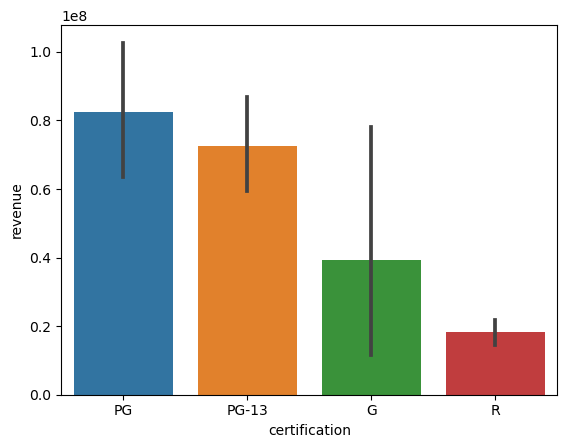

In [8]:
order=filter_df.groupby('certification')['revenue'].mean().sort_values(ascending=False).index
sns.barplot(data=filter_df,x='certification',y='revenue',order=order);

### Most Revenue
    - PG

In [9]:
#create dict to hold groups
groups={}
#make loop to loop through all unique categories
for i in filter_df['certification'].unique():
    #get series for group and rename
    data=filter_df.loc[filter_df['certification']==i, 'revenue'].copy()

    #save into the dict
    groups[i]=data
groups.keys()

dict_keys(['R', 'PG-13', 'PG', 'G'])

In [10]:
display(groups)

{'R': 1               0.0
 10       78000586.0
 16              0.0
 27              0.0
 43              0.0
             ...    
 16704           0.0
 16826           0.0
 16887     1964806.0
 16930       15712.0
 16935           0.0
 Name: revenue, Length: 1439, dtype: float64,
 'PG-13': 4         99318987.0
 23        16123851.0
 28        14793624.0
 30           16201.0
 37               0.0
             ...     
 16581    115570314.0
 16760            0.0
 16819            0.0
 16849            0.0
 16925            0.0
 Name: revenue, Length: 824, dtype: float64,
 'PG': 5         28283637.0
 38         9109322.0
 44          293793.0
 47               0.0
 63       928760770.0
             ...     
 16824            0.0
 16945            0.0
 16948            0.0
 16972            0.0
 17015            0.0
 Name: revenue, Length: 412, dtype: float64,
 'G': 164              0.0
 196      310634054.0
 458      134734481.0
 591              0.0
 705             10.0
             .

## Testing Assumptions

### Normality

In [11]:
#running normal test on each group and confirming there are >20 in each group
norm_results={}
for i, data in groups.items():
    stat,p=stats.normaltest(data)
    #save the p val, test statistic, and the size of the group
    norm_results[i]={'n':len(data),
                    'p': p,
                    'test stat':stat,}

#convert to a dataframe
norm_results_df=pd.DataFrame(norm_results).T
norm_results_df

,n,p,test stat
R,1439.0,0.000000e+00,1938.863465
PG-13,824.0,1.457436e-216,993.963402
PG,412.0,9.944999e-79,359.214305
G,95.0,2.777170e-31,140.717411


In [12]:
#adding a significant column to simplify
#new column add a bool if p is <.05
norm_results_df['sig']=norm_results_df['p']<.05
norm_results_df

,n,p,test stat,sig
R,1439.0,0.000000e+00,1938.863465,True
PG-13,824.0,1.457436e-216,993.963402,True
PG,412.0,9.944999e-79,359.214305,True
G,95.0,2.777170e-31,140.717411,True


### Testing Equal Variance

In [13]:
# Using the * operator to select all groups
stats.levene(*groups.values())

LeveneResult(statistic=35.53326000257578, pvalue=1.5805346254687642e-22)

### One-way ANOVA test
    - all assumption were met
        - Normality
        - Equal Variance

In [14]:
#Perform the correct hypothesis test
#note again the use of the * operator for convenience
result = stats.f_oneway(*groups.values())
result

F_onewayResult(statistic=35.49723620560069, pvalue=1.6641517304028898e-22)

### Kruskal-Wallis

In [15]:
wallis=stats.kruskal(*groups.values())
wallis

KruskalResult(statistic=116.86454933271585, pvalue=3.652890555608602e-25)

### Tukey's Pairwise Mutiple Comparisons Test

In [16]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
#save the revenue as values and certification as labels
values=filter_df['revenue']
labels=filter_df['certification']

In [17]:
#perfor tuekey's multiple comparison test and display the summary
tukeys_results=pairwise_tukeyhsd(values,labels)
tukeys_results.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
G,PG,43226590.0445,0.0431,911545.69,85541634.399,True
G,PG-13,33292539.6076,0.1456,-6991552.3462,73576631.5614,False
G,R,-20886804.9975,0.5226,-60270976.2892,18497366.2942,False
PG,PG-13,-9934050.4369,0.6658,-32367613.2957,12499512.4219,False
PG,R,-64113395.042,0.0,-84887648.9717,-43339141.1124,True
PG-13,R,-54179344.6051,0.0,-70421718.5743,-37936970.636,True


### Significant results
    - G VS PG
    - PG VS R
    - PG-13 VS R


# Do movies that are over 2.5 hours long earn more revenue than movies that are 1.5 hours long(orless)

In [18]:
df.columns

Index(['imdb_id', 'adult', 'backdrop_path', 'belongs_to_collection', 'budget',
       'genres', 'homepage', 'id', 'original_language', 'original_title',
       'overview', 'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count', 'certification'],
      dtype='object')

In [32]:

one= df[df['runtime']>150]
nine=df[df['runtime']<=90]
one['runtime'].mean()

177.65123456790124

In [33]:
nine['runtime'].mean()

71.18828167482327

In [34]:
one.columns

Index(['imdb_id', 'adult', 'backdrop_path', 'belongs_to_collection', 'budget',
       'genres', 'homepage', 'id', 'original_language', 'original_title',
       'overview', 'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count', 'certification'],
      dtype='object')

### Outliers

In [40]:
one_rev=one['revenue']

In [41]:
nine_rev=nine['revenue']

In [42]:
zscore_o=stats.zscore(one_rev)
outliers_o=abs(zscore_o)>3
np.sum(outliers_o)

4

In [43]:
zscore_n=stats.zscore(nine_rev)
outliers_n=abs(zscore_n)>3
np.sum(outliers_n)

42

### Removing Outliers

In [44]:
one_rev=one_rev[(np.abs(stats.zscore(one_rev))<3)]

In [45]:
nine_rev=nine_rev[(np.abs(stats.zscore(nine_rev))<3)]

### Check Noramality

In [46]:
results_one_rev=stats.normaltest(one_rev)
results_one_rev

NormaltestResult(statistic=419.644290292974, pvalue=7.505855197539065e-92)

In [48]:
results_nine_rev=stats.normaltest(nine_rev)
results_nine_rev

NormaltestResult(statistic=13808.315484750678, pvalue=0.0)

### Equal Variance

In [49]:
results=stats.levene(one_rev,nine_rev)
results

LeveneResult(statistic=346.14818397292055, pvalue=1.349775597418952e-75)

### T_Test

In [50]:
result=stats.ttest_ind(one_rev,nine_rev,equal_var=False)
result

Ttest_indResult(statistic=3.958396918149244, pvalue=9.306468106420854e-05)

## Do movies released in 2019 earn less revenue than movies released in 2021?
### How do the years compare for movie ratings?

### Testing for Outliers

In [24]:
zscore_one=stats.zscore(one)
outliers_o=abs(zscore_one)>3
np.sum(outliers_o)

TypeError: can only concatenate str (not "float") to str

In [27]:
one=one.astype(str)
type(one)

pandas.core.frame.DataFrame

In [28]:
zscore_one=stats.zscore(one)
outliers_o=abs(zscore_one)>3
np.sum(outliers_o)

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [29]:
results_o=stats.normaltest(one)
results_o

TypeError: unsupported operand type(s) for /: 'str' and 'int'